## SuperMario Frames Preprocessing

In [1]:
import gym_super_mario_bros as gym
import matplotlib.pyplot as plt

env = gym.make('SuperMarioBros-v0')
state = env.reset()
plt.imshow(state)
plt.show()
print(f'image of size {state.shape[0]}x{state.shape[1]}')

<Figure size 640x480 with 1 Axes>

image of size 240x256


The idea is to highlight Mario, cut the top part of the frame and make background darker

<class 'numpy.ndarray'>


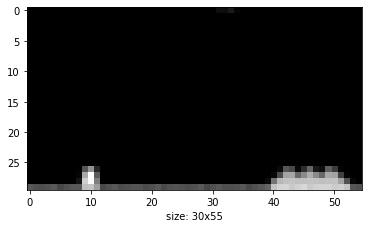

In [2]:
import torchvision
from supermario_dqn.preprocess import *
from torchvision import transforms
import numpy as np

state_ = preprocess(state, 30, 55)
print(type(state))
plt.imshow(state_, cmap='gray')
plt.xlabel(f'size: {state_.shape[0]}x{state_.shape[1]}')
plt.show()

Neural Network will be feed with a 4x30x55 frame containing 4 frames

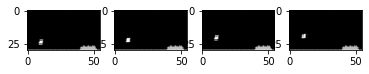

In [3]:
from collections import deque
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace 

env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

env.reset()
action = 2

# init
for i in range(4):
    env.step(action)[0]
    
for i in range(4):
    state = None
    for j in range(2):
        state = env.step(action)[0]
        
    plt.subplot(1, 4, i+1)
    plt.imshow(preprocess(state, 30, 55), cmap='gray')
    
plt.show()

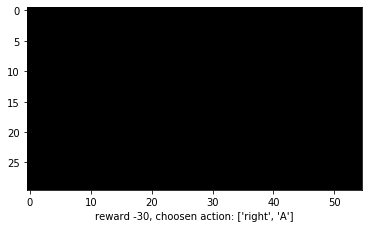

random reward: 3423
710 steps


In [4]:
from nes_py.wrappers import JoypadSpace 
from IPython.display import clear_output
import random
from collections import deque
from supermario_dqn.environment import MarioEnvironment

env = MarioEnvironment(4, lambda s: preprocess(s, 30, 55))
env.reset()

done = False
reward = 0
step = 0

while not done:
    action = random.randint(0, len(env.actions) - 1)
    action = 2
    obs, r, done, info = env.step(action)
    reward += r
    step += 1
    
    if step % 1 == 0:
        clear_output(wait=True)
        plt.imshow(obs[0], cmap='gray')
        plt.xlabel(f'reward {r}, choosen action: {env.actions[action]}')
        plt.show()
    
print(f'random reward: {reward}')
print(f'{step} steps')